In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import GMM
from scipy.stats import multivariate_normal as mvn

%matplotlib inline

# Load the data

In [2]:
img = cv2.imread('banana.png')

box = [200, 520, 280, 360]
x1, x2, y1, y2 = box

# Fit on the data from inside the box

In [3]:
in_box = img[y1: y2, x1: x2, :]
in_box = in_box.reshape([-1, in_box.shape[-1]])

In [4]:
K = 5 # Number of components

gmm = GMM(n_components=K, covariance_type='full')
gmm = gmm.fit(in_box)

means = gmm.means_
covars = gmm.covars_
mix = gmm.weights_

#### Display the values of $p(x)$

In [17]:
probas = mix.dot([mvn.pdf(in_box, means[k], covars[k]) for k in range(K)])

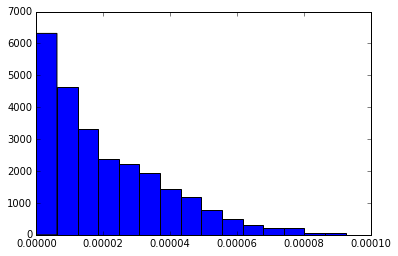

In [18]:
plt.hist(probas, bins=15)
plt.show()

#### Show the segmented image

In [20]:
def show_segmented(img, means, covariances, mixing_proportions, threshold=1e-7):
    K = means.shape[0]
    flat_img = img.reshape([-1, img.shape[-1]])
    probas = np.array([mixing_proportions[k] * mvn.pdf(flat_img, means[k], covariances[k]) for k in range(K)]).T
    probas = probas.sum(axis=1)
    plt.figure(figsize=[10, 10])
    plt.imshow((probas > threshold).reshape(img.shape[:2]))
    plt.show()

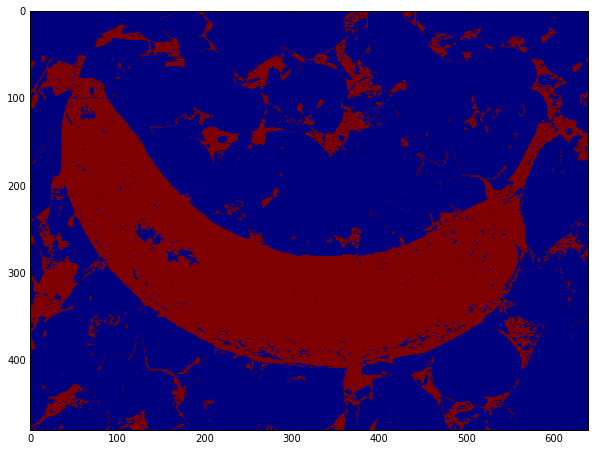

In [21]:
show_segmented(img, means, covars, mix)

# Fit on the data from outside the box

In [22]:
xrange = set(range(x1, x2))
yrange = set(range(y1, y2))

outside_box = []
for (x, y), val in np.ndenumerate(img[:, :, 0]):
    if x not in xrange and y not in yrange:
        outside_box.append(img[x, y, :])
        
outside_box = np.array(outside_box)

In [23]:
K = 5 # Number of components

gmm = GMM(n_components=K, covariance_type='full')
gmm = gmm.fit(outside_box)

means = gmm.means_
covars = gmm.covars_
mix = gmm.weights_

#### Show the segmented image

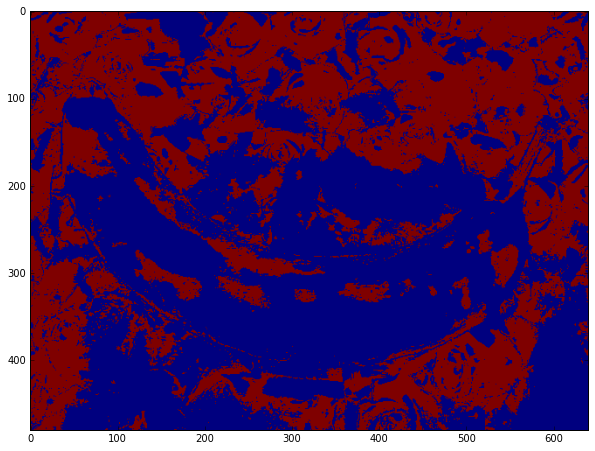

In [24]:
show_segmented(img, means, covars, mix, threshold=1e-6)